In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
#outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts_donors/"
#se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"


input_col = "Input"
use_input = False


# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/results/clones/variants.init_knnRes.3/aggregate/clone_cluster_sizes"
se_cells_meta_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/results/clones/variants.init_knnRes.3/aggregate/cells_meta.csv"
#sample_names = "Control,Flt3l,Input"
min_cell = 1
keep_top = 20
keep_top_single = 10 # for the plots with same donor



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
%matplotlib inline

In [3]:
# figures_d = {"f1a": "clone_counts.shareY.pdf",
#              "f1b": "clone_counts.noShareY.pdf",
#              "f2": "norm.clone_counts.shareY.pdf",
#              "f3a": "norm.top.clone_counts.shareY.pdf",
#              "f3b": "norm.top.clone_counts.noShareY.pdf",
#              "f4": "norm.top.clone_counts.samePanel.pdf",
#              "f5a": "inputOnly.norm.top.clone_counts.samePanel.pdf",
#              "f5b": "inputOnly.sqrt_norm.top.clone_counts.samePanel.pdf",
#              "f6": "inputOnly.norm.top.clone_counts.samePanel.pdf"}

# for i in figures_d:
#     figures_d[i] = join(outdir, figures_d[i])
# figures_d

In [4]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

## Load cells_meta and rename cluster labels to replace '/' with '_'

In [5]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
se_cells_meta["nuclear_clusters"] = se_cells_meta["nuclear_clusters"].apply(lambda x: "None" if pd.isnull(x) else x.replace("/", "_"))
# if "cluster_labels" in se_cells_meta.columns:
#     se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
# else:
#     se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)
se_cells_meta

,Unnamed: 0,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
0,Input_AAACGAAAGGAAACTT-1,Input,2831,2831,49701.0,5002,164,92,1138,37812,...,2,3505,2884,AAACGAAAGGAAACTT-1_Input,Input_AAACGAAAGGAAACTT-1,4,CHIP_a1_4,Input,CHIP_a1_4_4,2
1,Input_AAACGAAGTCCAAGAG-1,Input,4565,4565,62869.0,9096,249,139,1902,42086,...,0,6161,4469,AAACGAAGTCCAAGAG-1_Input,Input_AAACGAAGTCCAAGAG-1,1,CHIP_a1_3,Input,CHIP_a1_3_1,0
2,Input_AAACGAAGTCCGAGCT-1,Input,7229,7229,60574.0,11583,352,141,2087,31767,...,1,9778,6201,AAACGAAGTCCGAGCT-1_Input,Input_AAACGAAGTCCGAGCT-1,23,CHIP_a1_0,Input,CHIP_a1_0_23,1
3,Input_AAACGAAGTTCAGAAA-1,Input,2846,2846,32202.0,4591,146,90,911,19849,...,0,3786,2952,NaN,Input_AAACGAAGTTCAGAAA-1,None,CHIP_a1_None,None,CHIP_a1_None,0
4,Input_AAACGAAGTTTGAAGA-1,Input,7001,7001,68829.0,12010,432,163,2209,39985,...,1,9266,5942,AAACGAAGTTTGAAGA-1_Input,Input_AAACGAAGTTTGAAGA-1,20,CHIP_a1_4,Input,CHIP_a1_4_20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47346,Flt3l_TTTGTGTTCGAGTTAC-1,Flt3l,2680,2680,17658.0,2695,42,85,1186,5949,...,4,4305,3338,TTTGTGTTCGAGTTAC-1_Flt3l,Flt3l_TTTGTGTTCGAGTTAC-1,54,cd34norm_3,Flt3l,cd34norm_3_54,neutrophil
47347,Flt3l_TTTGTGTTCGCATAAC-1,Flt3l,1360,1360,11301.0,1275,40,44,596,4231,...,1,2715,2291,NaN,Flt3l_TTTGTGTTCGCATAAC-1,None,cd34norm_None,None,cd34norm_None,neutrophil
47348,Flt3l_TTTGTGTTCGTGGTAT-1,Flt3l,1510,1510,9188.0,1165,33,42,620,3337,...,4,2336,2023,TTTGTGTTCGTGGTAT-1_Flt3l,Flt3l_TTTGTGTTCGTGGTAT-1,4,cd34norm_1,Flt3l,cd34norm_1_4,neutrophil
47349,Flt3l_TTTGTGTTCGTTACAG-1,Flt3l,4063,4063,35699.0,6656,184,194,1921,15800,...,1,5881,4209,TTTGTGTTCGTTACAG-1_Flt3l,Flt3l_TTTGTGTTCGTTACAG-1,9,cd34norm_2,Flt3l,cd34norm_2_9,neutrophil


In [6]:
se_cells_meta["nuclear_clusters"].unique()

array(['2', '0', '1', '10', '4', '7', '3', '11', '5', '6', '8', '12',
       '13', '9', 'eosonophil', 'MPP_CMP_GMP C', 'erythroid',
       'neutrophil', 'MPP_CMP_GMP D', 'macrophage', 'monocyte',
       'neutrophil B', 'meg_erythroid', 'MPP_CMP_GMP', 'None',
       'MPP_CMP_GMP B', 'CLP', 'DC', 'MEP', 'Eosinophil', 'macrophages',
       'Erythroid', 'NeP', 'pDC?', 'progenitor'], dtype=object)

### Remove None before normalizing

In [7]:
if use_input:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]
se_cells_meta = se_cells_meta[se_cells_meta["nuclear_clusters"] != "None"]
se_cells_meta = se_cells_meta[~(se_cells_meta["name"].str.contains("_None"))]
se_cells_meta

,Unnamed: 0,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
0,Input_AAACGAAAGGAAACTT-1,Input,2831,2831,49701.0,5002,164,92,1138,37812,...,2,3505,2884,AAACGAAAGGAAACTT-1_Input,Input_AAACGAAAGGAAACTT-1,4,CHIP_a1_4,Input,CHIP_a1_4_4,2
1,Input_AAACGAAGTCCAAGAG-1,Input,4565,4565,62869.0,9096,249,139,1902,42086,...,0,6161,4469,AAACGAAGTCCAAGAG-1_Input,Input_AAACGAAGTCCAAGAG-1,1,CHIP_a1_3,Input,CHIP_a1_3_1,0
2,Input_AAACGAAGTCCGAGCT-1,Input,7229,7229,60574.0,11583,352,141,2087,31767,...,1,9778,6201,AAACGAAGTCCGAGCT-1_Input,Input_AAACGAAGTCCGAGCT-1,23,CHIP_a1_0,Input,CHIP_a1_0_23,1
4,Input_AAACGAAGTTTGAAGA-1,Input,7001,7001,68829.0,12010,432,163,2209,39985,...,1,9266,5942,AAACGAAGTTTGAAGA-1_Input,Input_AAACGAAGTTTGAAGA-1,20,CHIP_a1_4,Input,CHIP_a1_4_20,1
6,Input_AAACGAATCCCAGTAA-1,Input,2103,2103,30056.0,2764,124,63,832,22385,...,2,2540,2215,AAACGAATCCCAGTAA-1_Input,Input_AAACGAATCCCAGTAA-1,2,CHIP_a1_2,Input,CHIP_a1_2_2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47345,Flt3l_TTTGTGTTCCTTTGCG-1,Flt3l,2737,2737,25608.0,4593,78,159,1486,11639,...,4,4322,3369,TTTGTGTTCCTTTGCG-1_Flt3l,Flt3l_TTTGTGTTCCTTTGCG-1,14,cd34norm_1,Flt3l,cd34norm_1_14,neutrophil
47346,Flt3l_TTTGTGTTCGAGTTAC-1,Flt3l,2680,2680,17658.0,2695,42,85,1186,5949,...,4,4305,3338,TTTGTGTTCGAGTTAC-1_Flt3l,Flt3l_TTTGTGTTCGAGTTAC-1,54,cd34norm_3,Flt3l,cd34norm_3_54,neutrophil
47348,Flt3l_TTTGTGTTCGTGGTAT-1,Flt3l,1510,1510,9188.0,1165,33,42,620,3337,...,4,2336,2023,TTTGTGTTCGTGGTAT-1_Flt3l,Flt3l_TTTGTGTTCGTGGTAT-1,4,cd34norm_1,Flt3l,cd34norm_1_4,neutrophil
47349,Flt3l_TTTGTGTTCGTTACAG-1,Flt3l,4063,4063,35699.0,6656,184,194,1921,15800,...,1,5881,4209,TTTGTGTTCGTTACAG-1_Flt3l,Flt3l_TTTGTGTTCGTTACAG-1,9,cd34norm_2,Flt3l,cd34norm_2_9,neutrophil


In [8]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "donor"]).size()

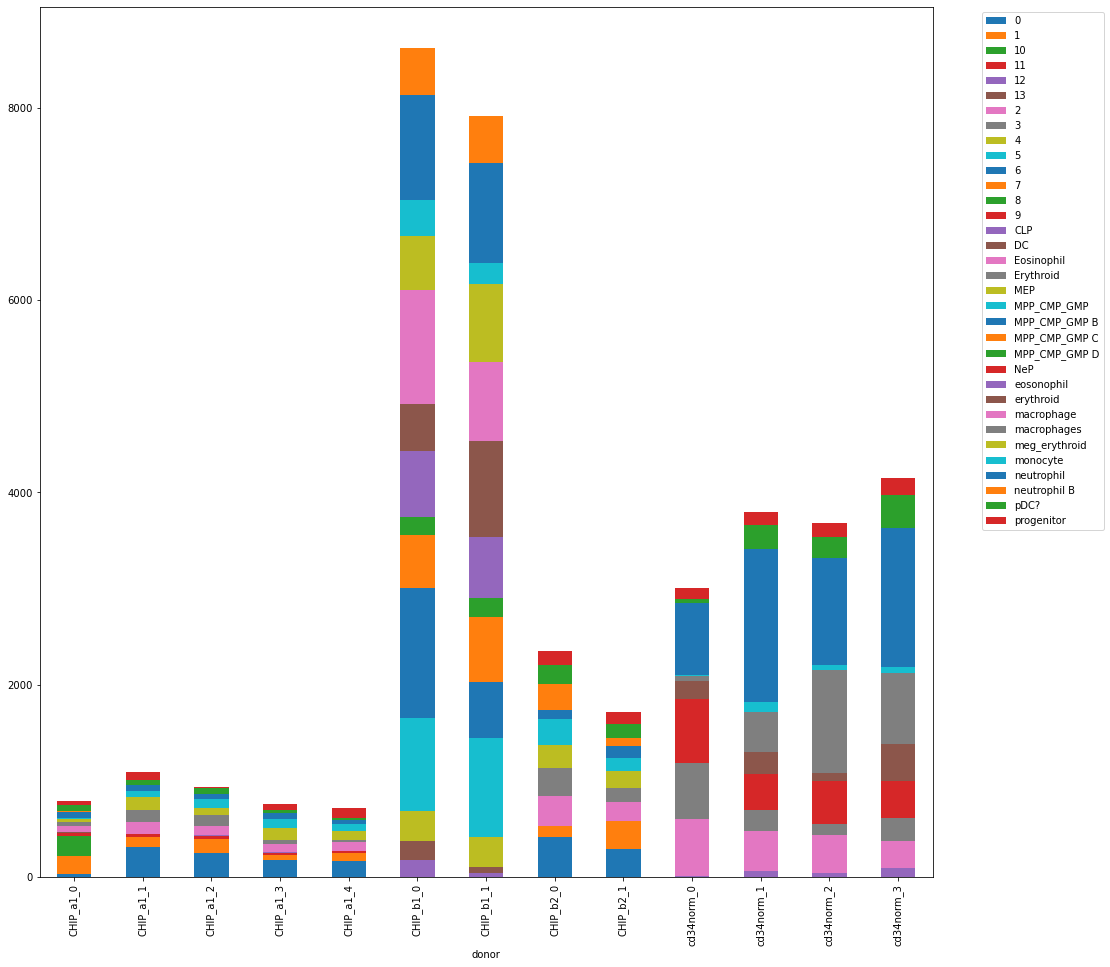

In [9]:
f, ax = plt.subplots(figsize=(16,16))
group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0).plot.bar(stacked=True, ax=ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "all_clones_barplot_clones.pdf"))

### Normalize to each donor

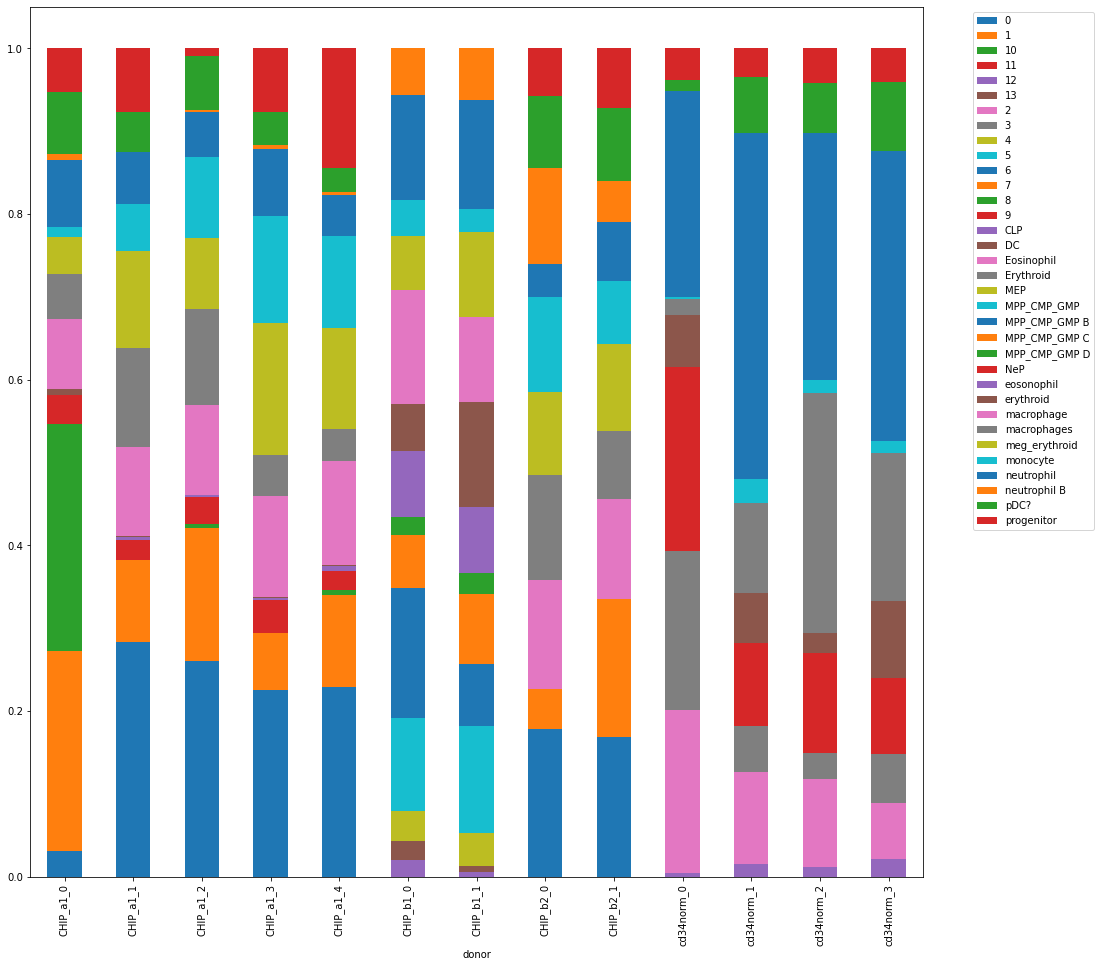

In [10]:
f, ax = plt.subplots(figsize=(16,16))
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0)#.plot.bar(stacked=True)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True, ax=ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_all_clones_barplot_clones.pdf"))

In [11]:
clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]
clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]
clone_counts_filt_10_df.head()

,donor,ncells,0,1,10,11,12,13,2,3,...,eosonophil,erythroid,macrophage,macrophages,meg_erythroid,monocyte,neutrophil,neutrophil B,pDC?,progenitor
name,,,,,,,,,,,,,,,,,,,,,
cd34norm_3_54,cd34norm_3,781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,77.0,0.0,134.0,0.0,6.0,311.0,0.0,40.0,27.0
CHIP_b1_1_0,CHIP_b1_1,560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.0,75.0,58.0,0.0,70.0,23.0,80.0,39.0,0.0,0.0
cd34norm_3_0,cd34norm_3,500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,41.0,0.0,76.0,0.0,2.0,213.0,0.0,26.0,31.0
CHIP_b1_1_1,CHIP_b1_1,499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,61.0,41.0,0.0,59.0,6.0,63.0,28.0,0.0,0.0
cd34norm_2_0,cd34norm_2,480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,0.0,111.0,0.0,8.0,174.0,0.0,23.0,40.0


In [12]:
def plots_donor(data, **kwargs):
    print(data.columns)
    data.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=plt.gca())
    return

# F1a: Clone-cluster barplot each donor is a panel. Shared y-axis

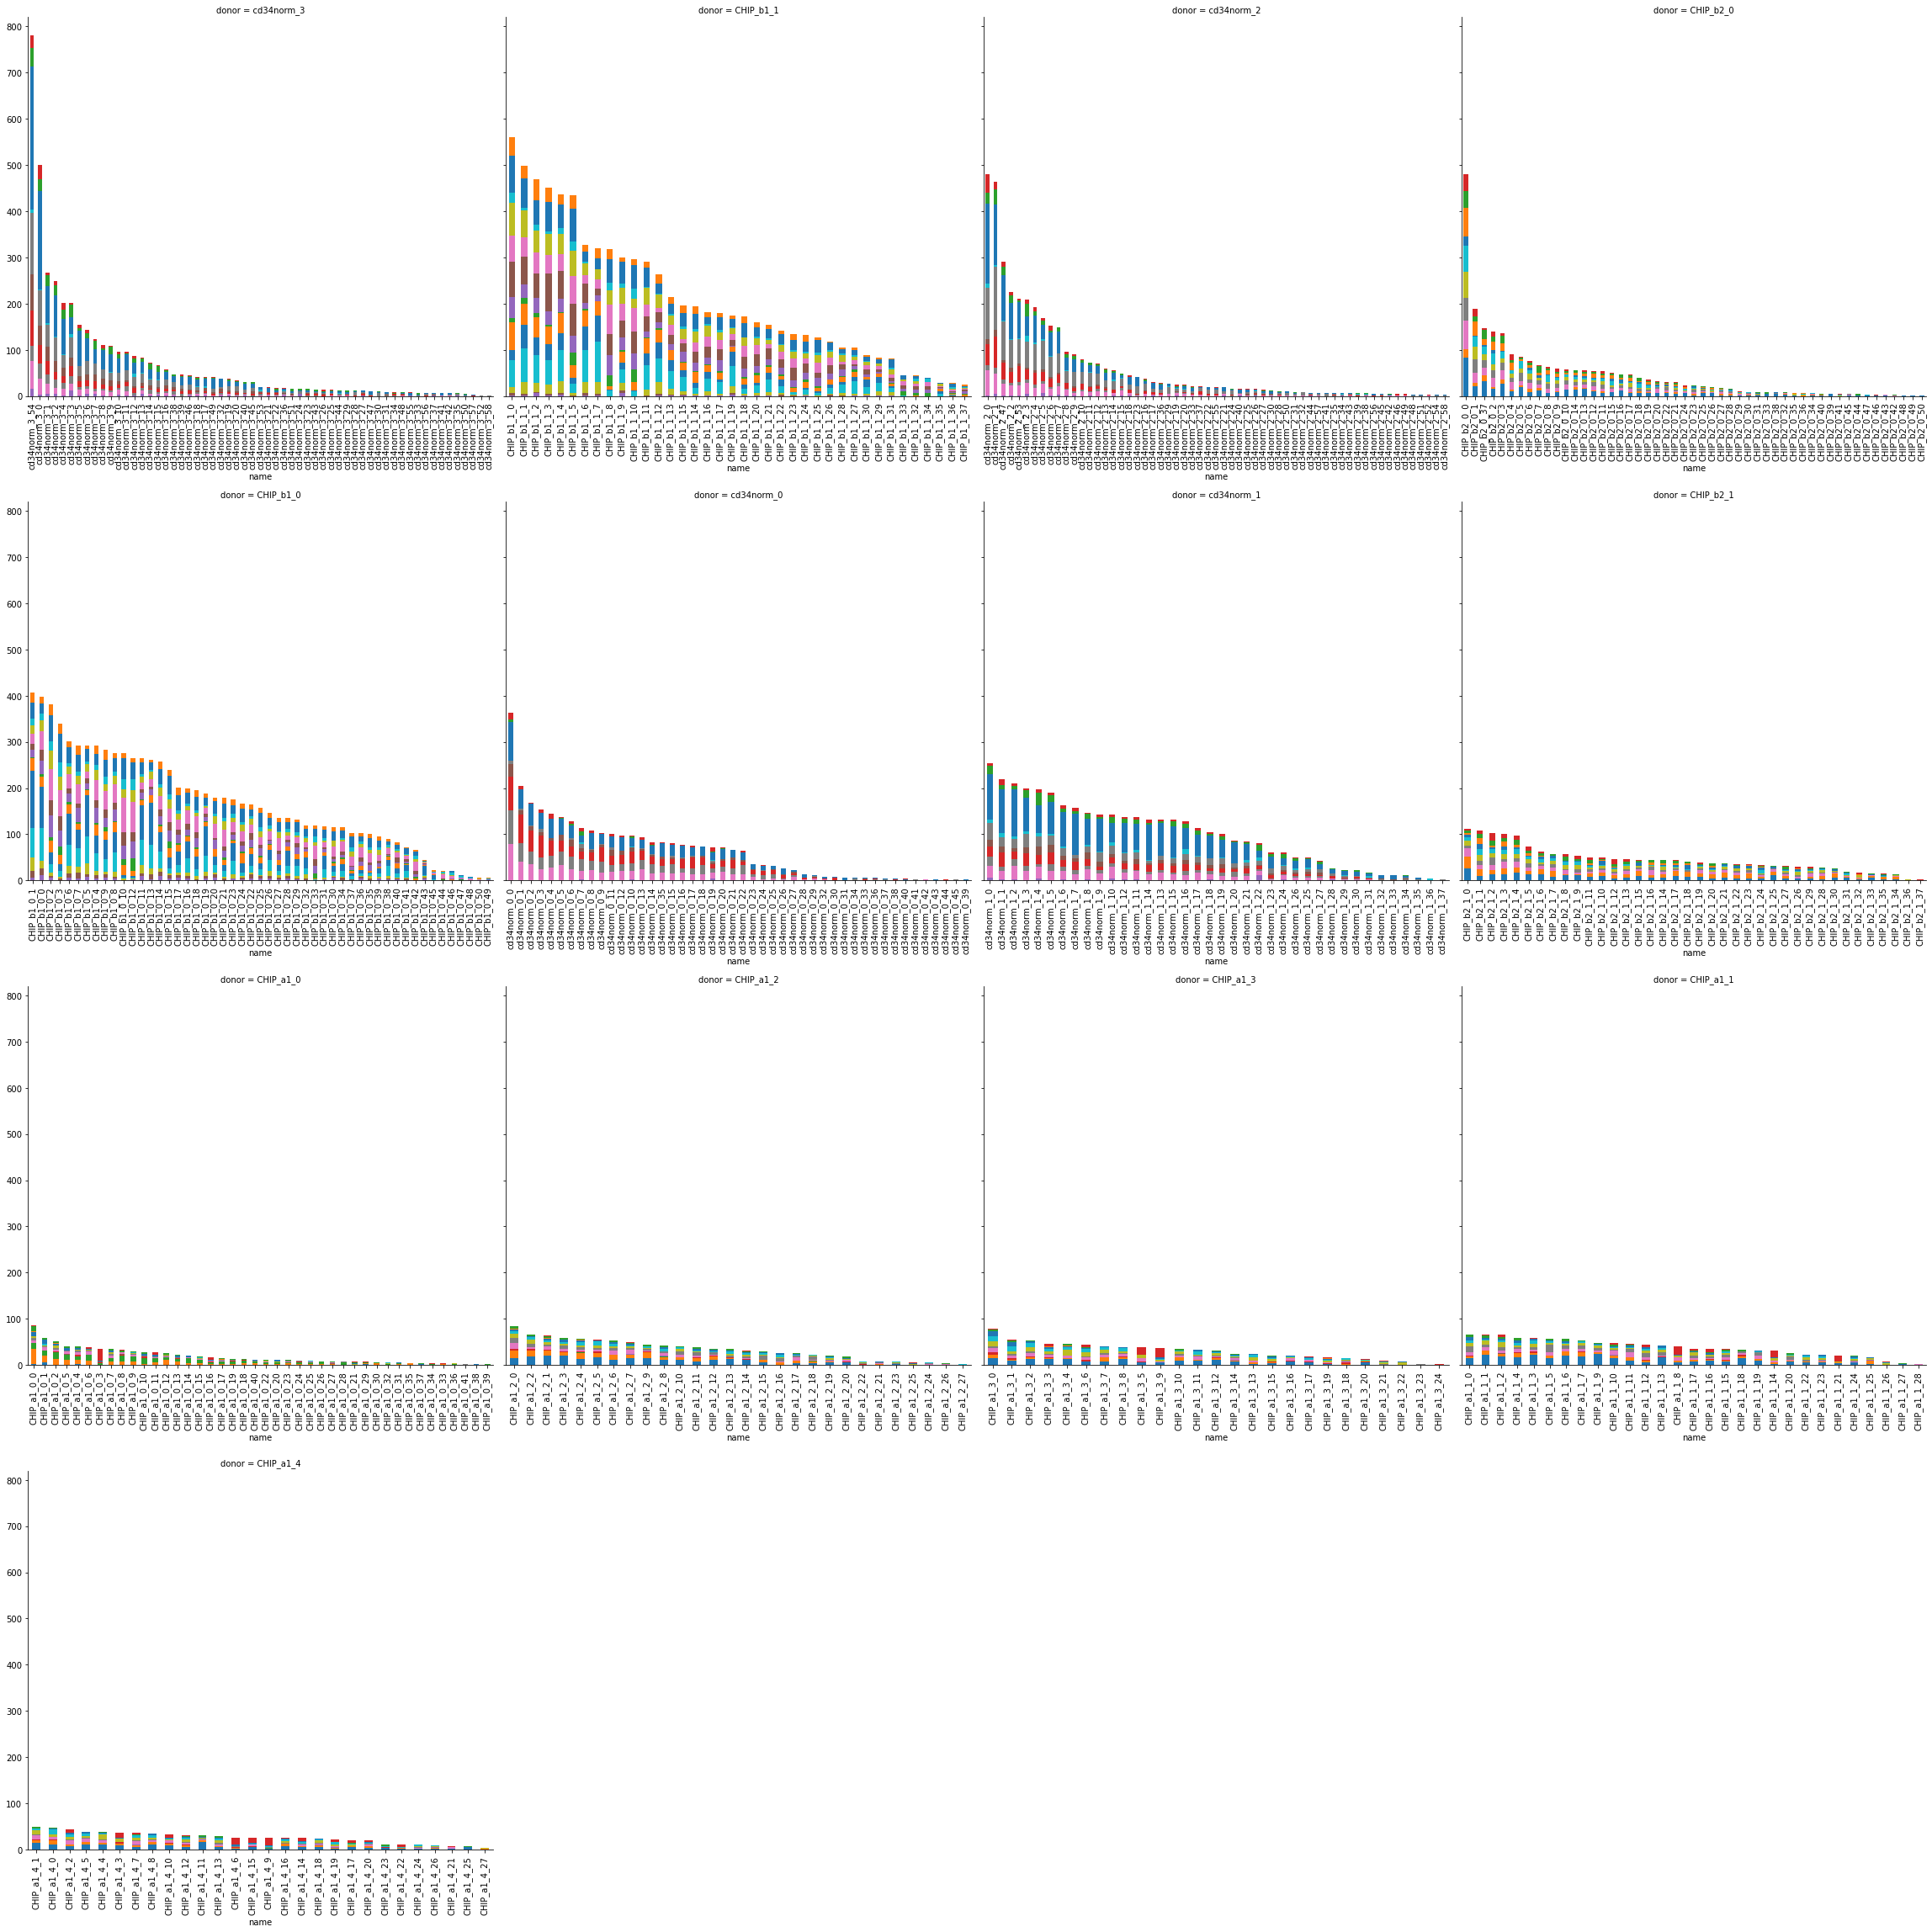

In [32]:
g = sns.FacetGrid(data=clone_counts_filt_10_df, col="donor", col_wrap=4, sharex=False, height=8)
g.map_dataframe(plots_donor)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)


# F1b: Clone-cluster barplot each donor is a panel. Un shared y-axis

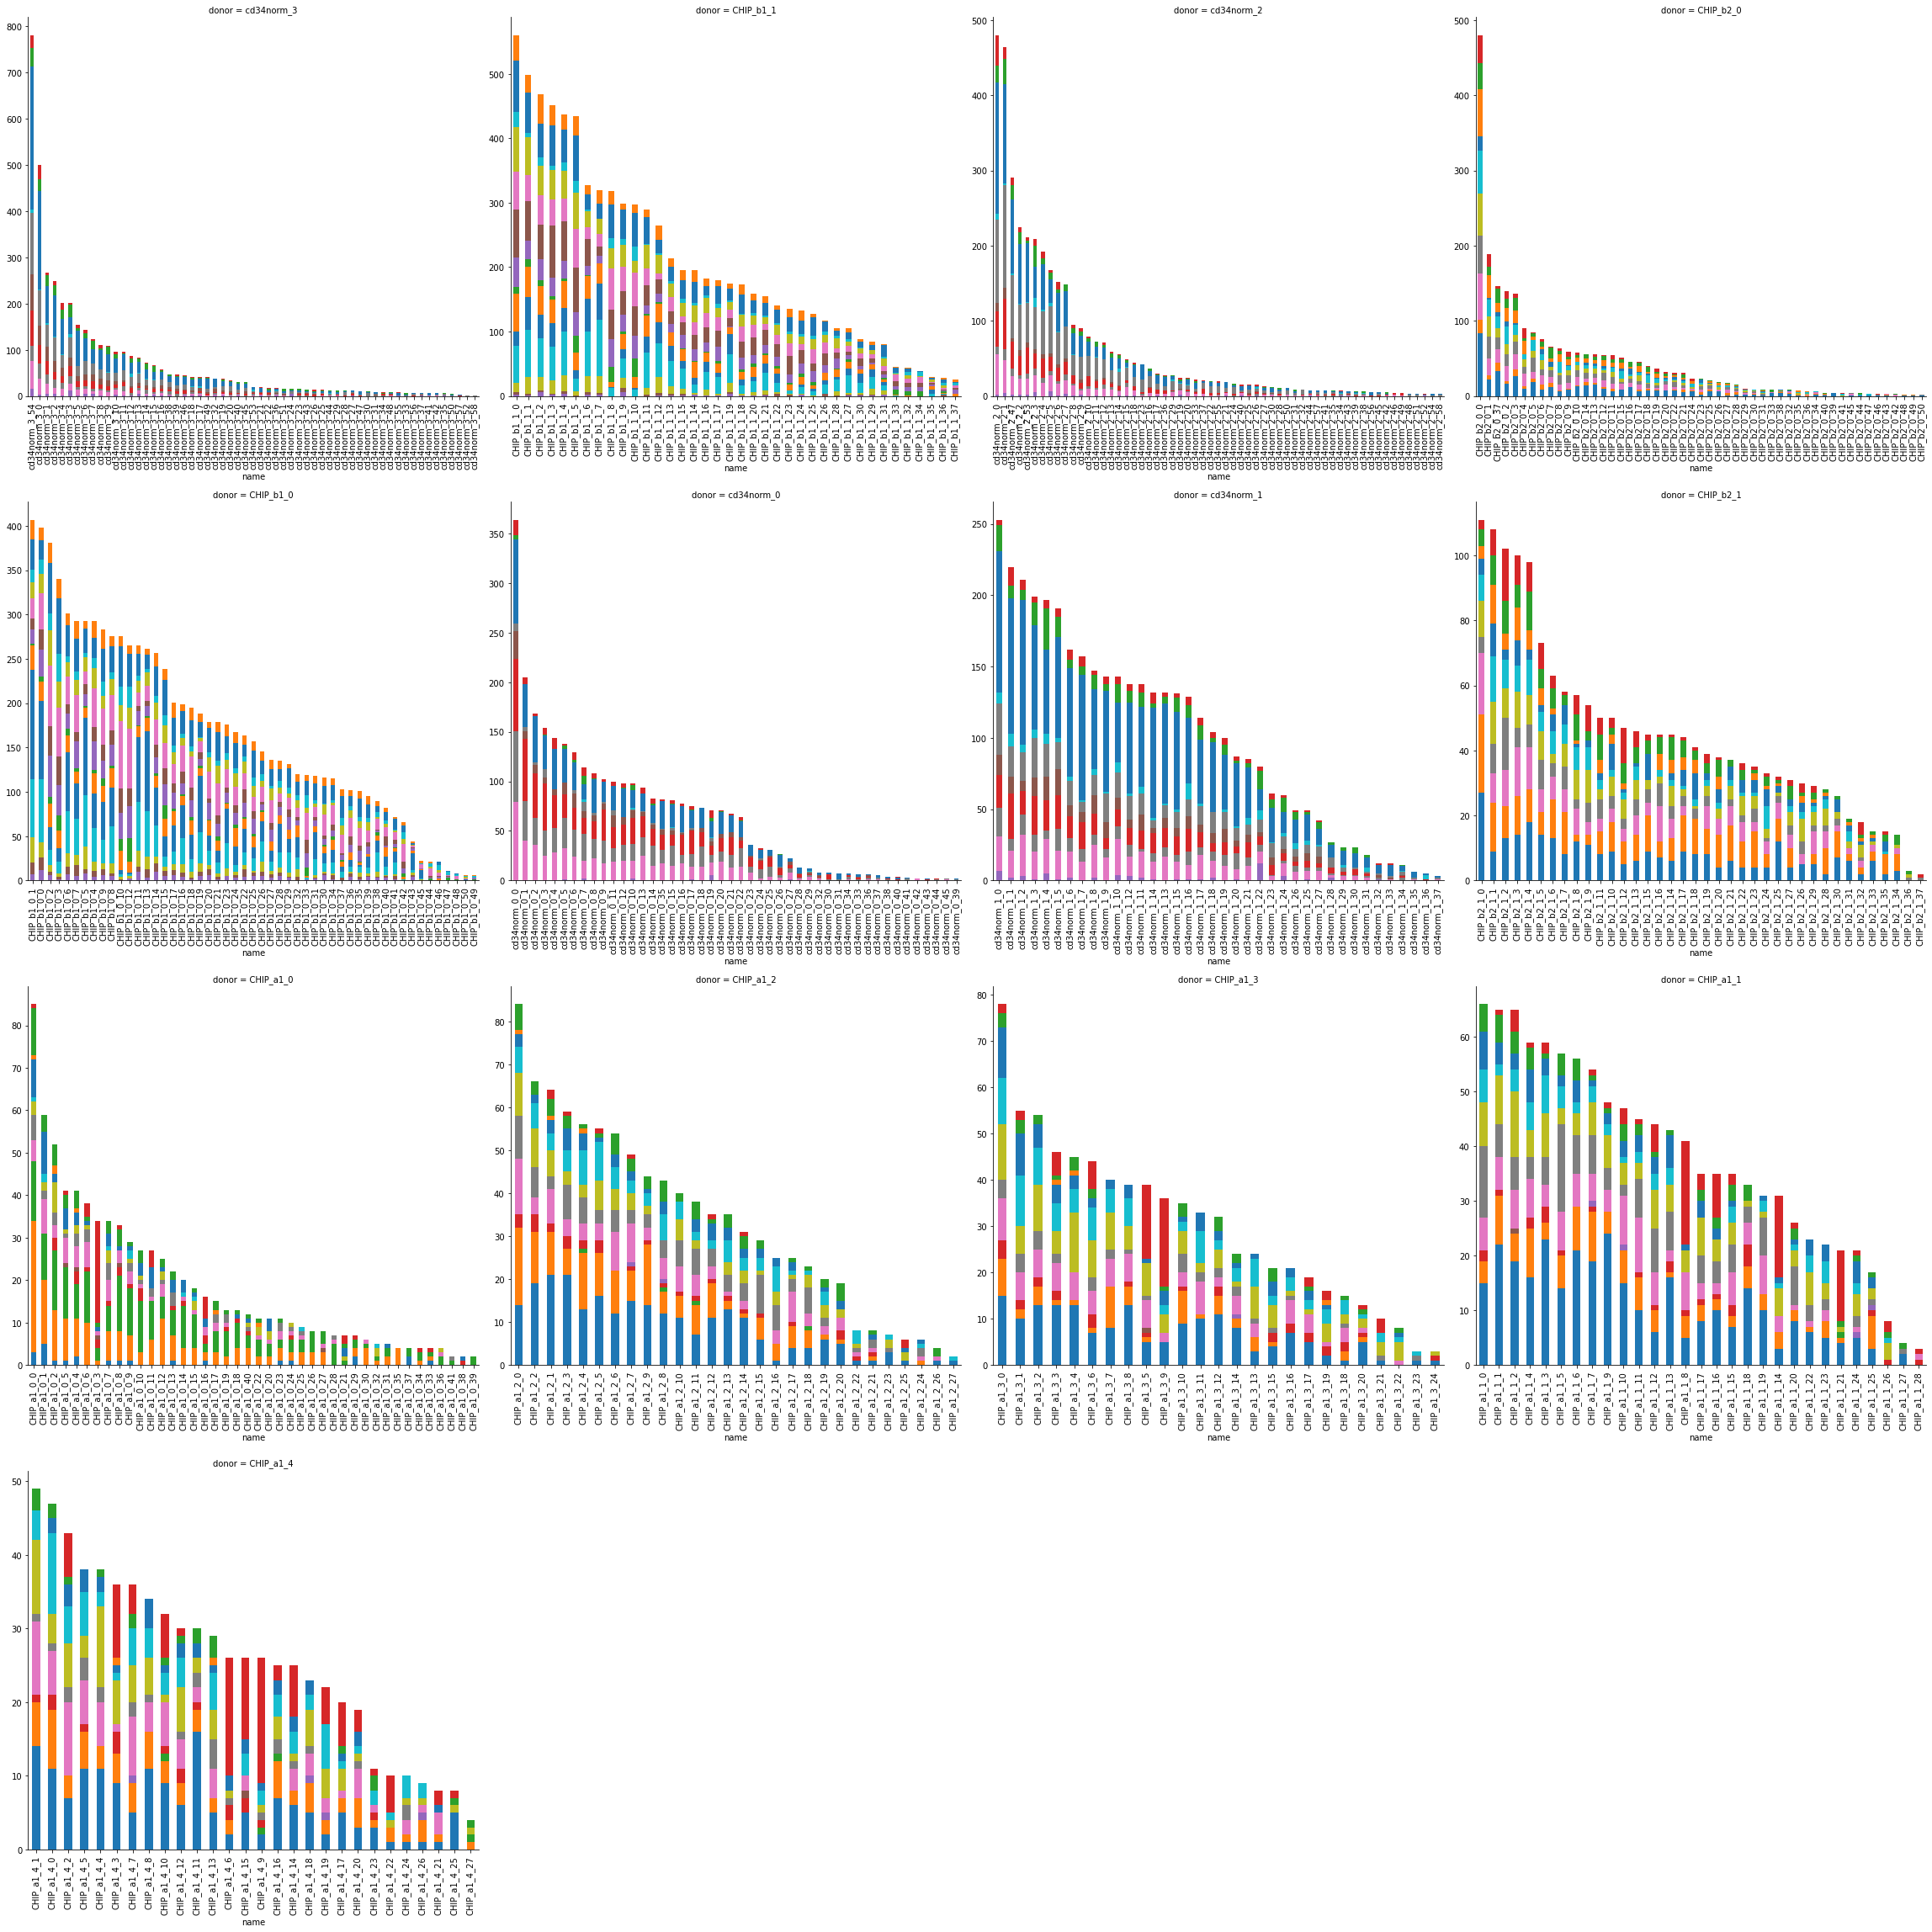

In [30]:
g = sns.FacetGrid(data=clone_counts_filt_10_df, col="donor", col_wrap=4, sharey=False, sharex=False, height=8)
g.map_dataframe(plots_donor)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)


# Normalize per clone

In [15]:
clone_sums = clone_counts.groupby("name").sum()["ncells"]
clone_sums

name
CHIP_a1_0_0       85
CHIP_a1_0_1       59
CHIP_a1_0_10      27
CHIP_a1_0_11      27
CHIP_a1_0_12      25
                ... 
cd34norm_3_58      2
cd34norm_3_6     143
cd34norm_3_7     124
cd34norm_3_8     110
cd34norm_3_9     109
Name: ncells, Length: 532, dtype: int64

In [16]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["name"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["nuclear_clusters", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df.head()


sum of normed values nuclear_clusters  donor     
0                 CHIP_a1_0     1.641217
                  CHIP_a1_1     7.622063
                  CHIP_a1_2     7.026220
                  CHIP_a1_3     5.638055
                  CHIP_a1_4     6.077098
                                  ...   
pDC?              cd34norm_3    7.886127
progenitor        cd34norm_0    1.291038
                  cd34norm_1    1.170435
                  cd34norm_2    2.167397
                  cd34norm_3    1.981475
Name: ncells, Length: 154, dtype: float64


,donor,ncells,0,1,10,11,12,13,2,3,...,eosonophil,erythroid,macrophage,macrophages,meg_erythroid,monocyte,neutrophil,neutrophil B,pDC?,progenitor
name,,,,,,,,,,,,,,,,,,,,,
CHIP_a1_0_0,CHIP_a1_0,1.0,0.035294,0.364706,0.164706,0.0,0.0,0.0,0.058824,0.070588,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
cd34norm_0_4,cd34norm_0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.041667,0.0,0.000000,0.0,0.0,0.284722,0.0,0.0,0.076389
cd34norm_0_38,cd34norm_0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.500000,0.0,0.0,0.000000
cd34norm_0_37,cd34norm_0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.400000,0.0,0.0,0.000000
cd34norm_0_35,cd34norm_0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.060976,0.0,0.012195,0.0,0.0,0.341463,0.0,0.0,0.024390


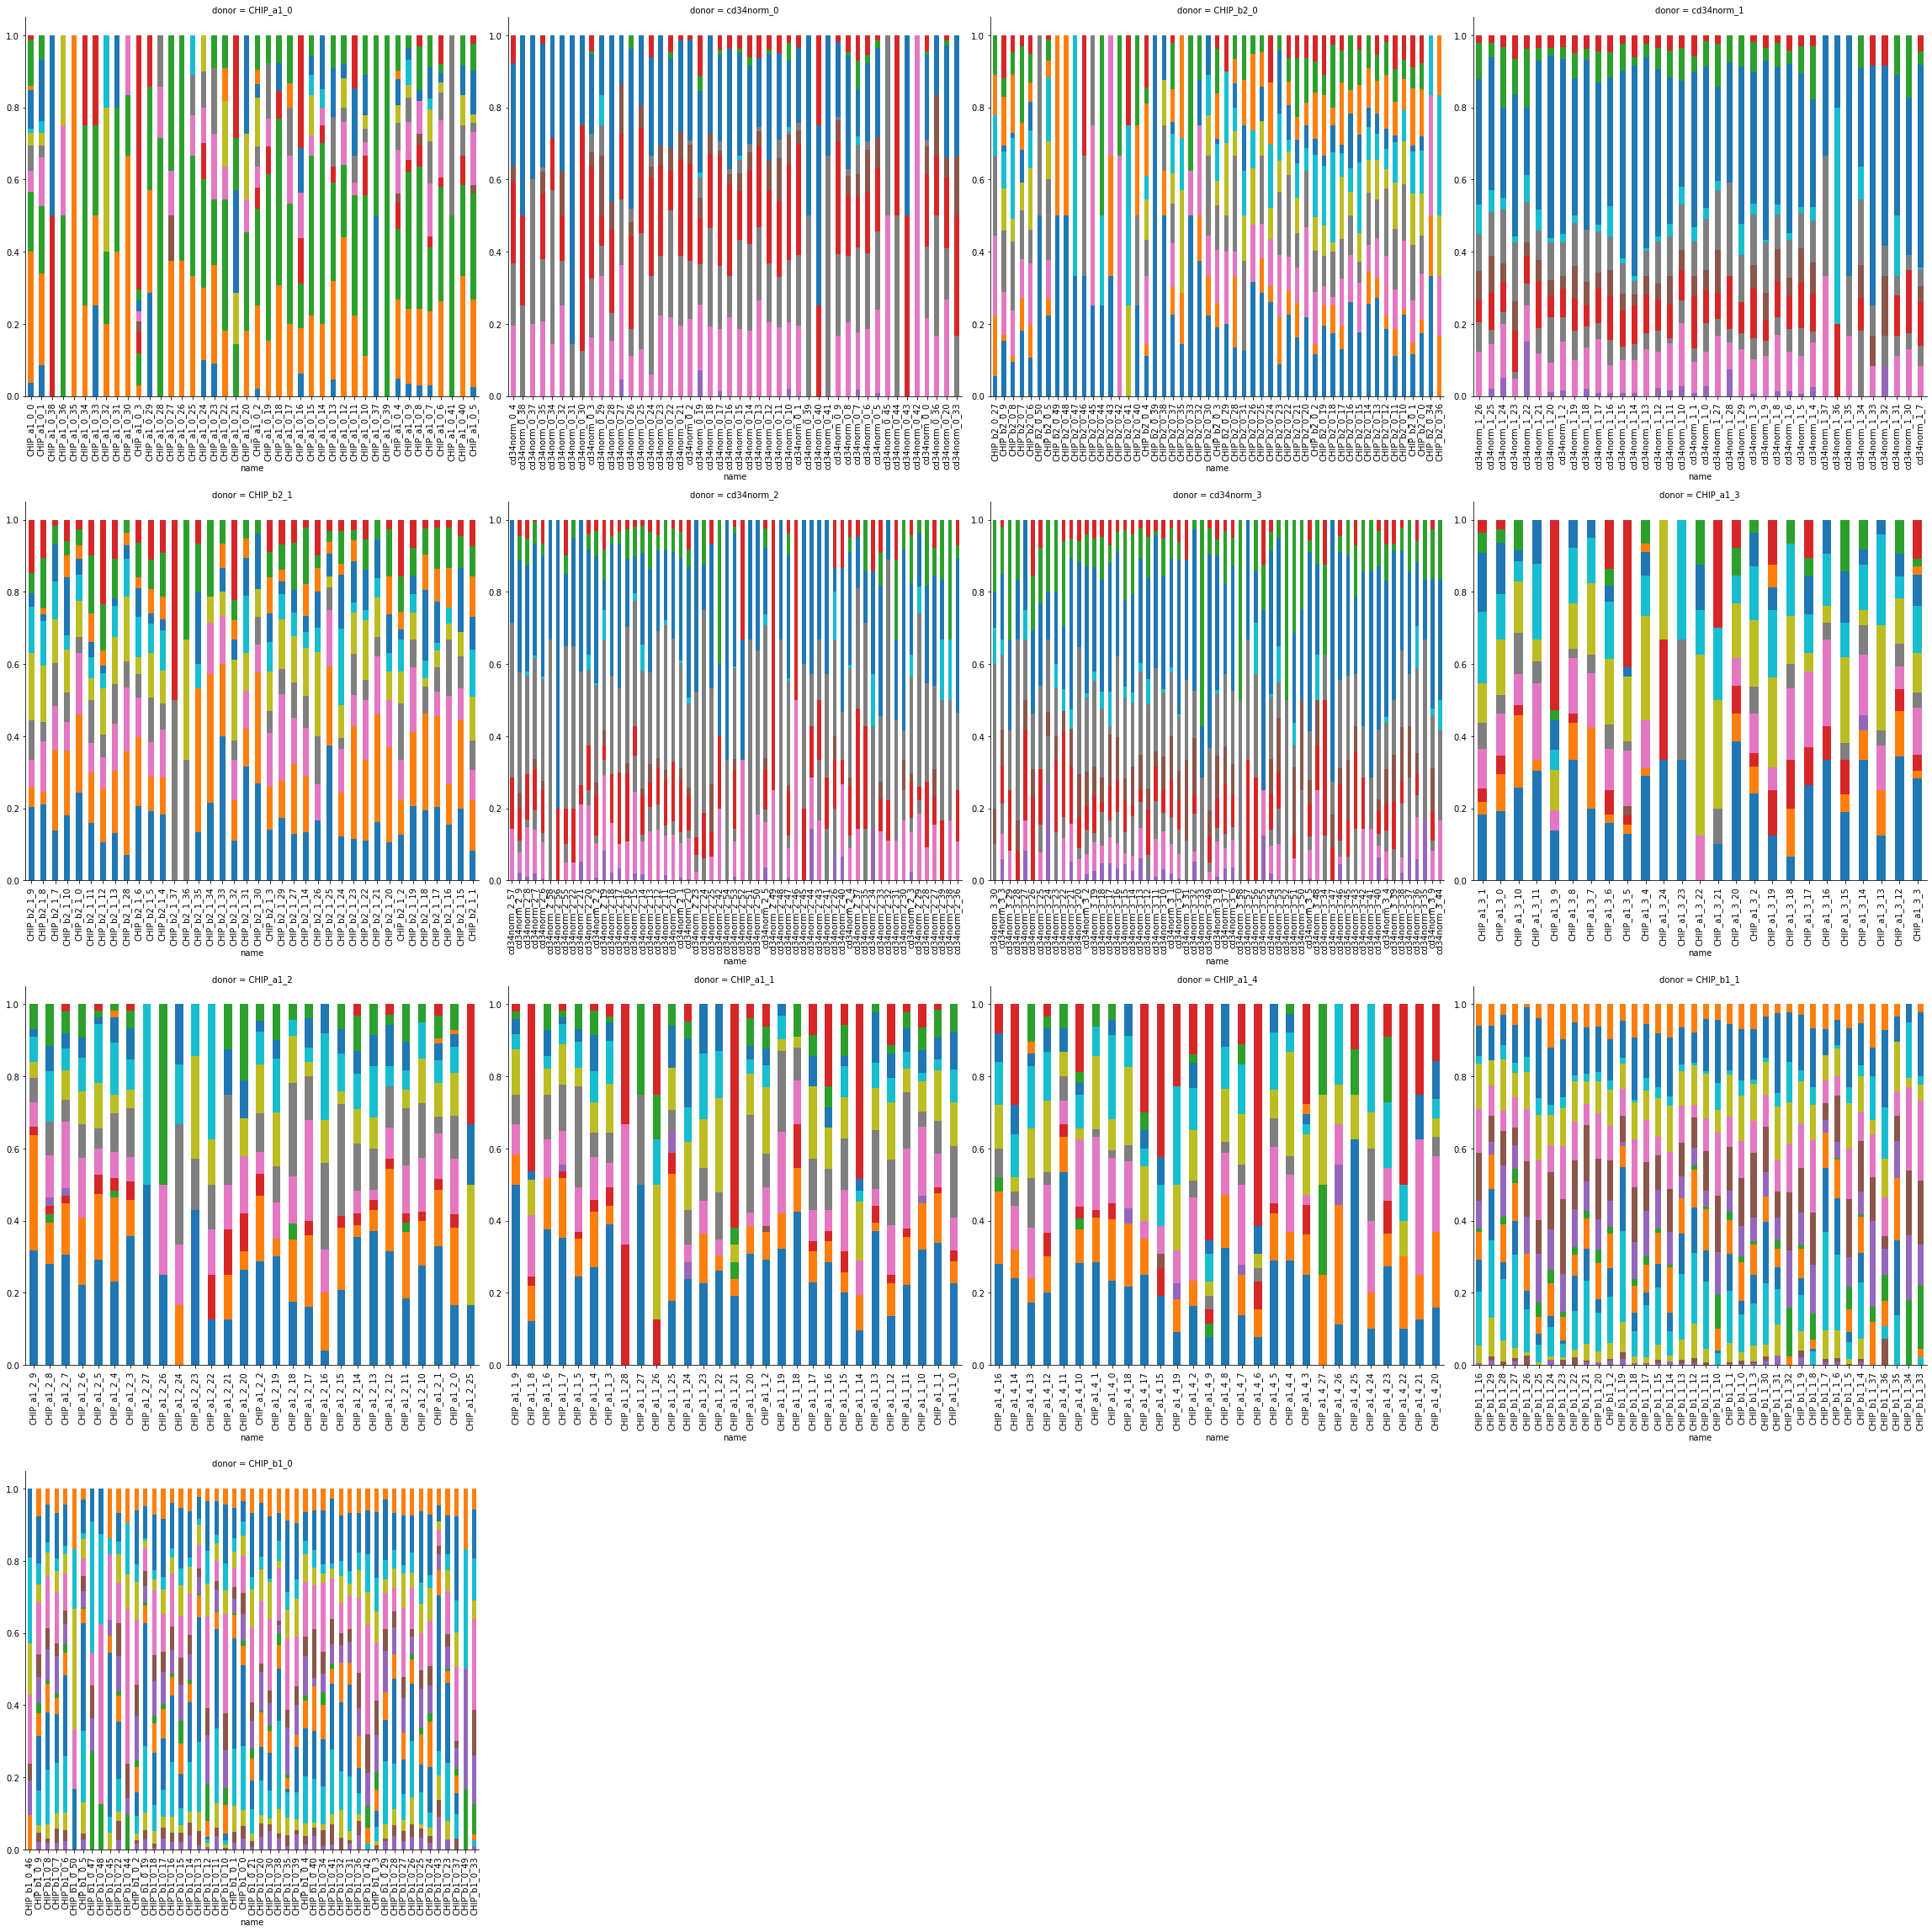

In [17]:
# donor_plots(clone_norm_df,
#       name="normalized_counts")

g = sns.FacetGrid(data=clone_norm_df, col="donor", col_wrap=4, sharey=False, sharex=False, height=8)
g.map_dataframe(plots_donor)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)


# Only top clones

In [33]:
ranks = clone_norm_df.groupby("donor")['ncells'].rank(ascending=False).astype(int)
clone_norm_df['rank'] = ranks
clone_counts_df['rank'] = ranks
clone_norm_df

top_clone_norm_df = clone_norm_df[clone_norm_df["rank"]<keep_top].sort_values("rank").drop("rank",axis=1)
top_clone_norm_df

top_clone_counts_df = clone_counts_df[clone_counts_df["rank"]<keep_top].sort_values("rank").drop("rank",axis=1)
top_clone_counts_df


#cell_25 = keep_top_clones(clone_counts_filt_10_df, min_cell=min_cell).index

,donor,ncells,0,1,10,11,12,13,2,3,...,eosonophil,erythroid,macrophage,macrophages,meg_erythroid,monocyte,neutrophil,neutrophil B,pDC?,progenitor
name,,,,,,,,,,,,,,,,,,,,,
CHIP_a1_3_2,CHIP_a1_3,54,13.0,4.0,0.0,2.0,0.0,0.0,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIP_a1_3_20,CHIP_a1_3,13,5.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIP_a1_3_6,CHIP_a1_3,44,7.0,1.0,0.0,3.0,0.0,0.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIP_a1_3_21,CHIP_a1_3,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIP_a1_3_15,CHIP_a1_3,21,4.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHIP_b2_1_6,CHIP_b2_1,63,13.0,12.0,0.0,0.0,0.0,0.0,7.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cd34norm_1_23,cd34norm_1,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,10.0,0.0,1.0,24.0,0.0,6.0,4.0
cd34norm_1_24,cd34norm_1,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,9.0,0.0,2.0,15.0,0.0,10.0,2.0


In [ ]:
# from sklearn.datasets import make_blobs
# import colorcet as cc
# import matplotlib.pyplot as plt
# import seaborn as sns

#https://stackoverflow.com/questions/68209351/how-to-make-a-color-map-with-many-unique-colors-in-seaborn
#palette = sns.color_palette(cc.glasbey, n_colors=25)


## For raw counts

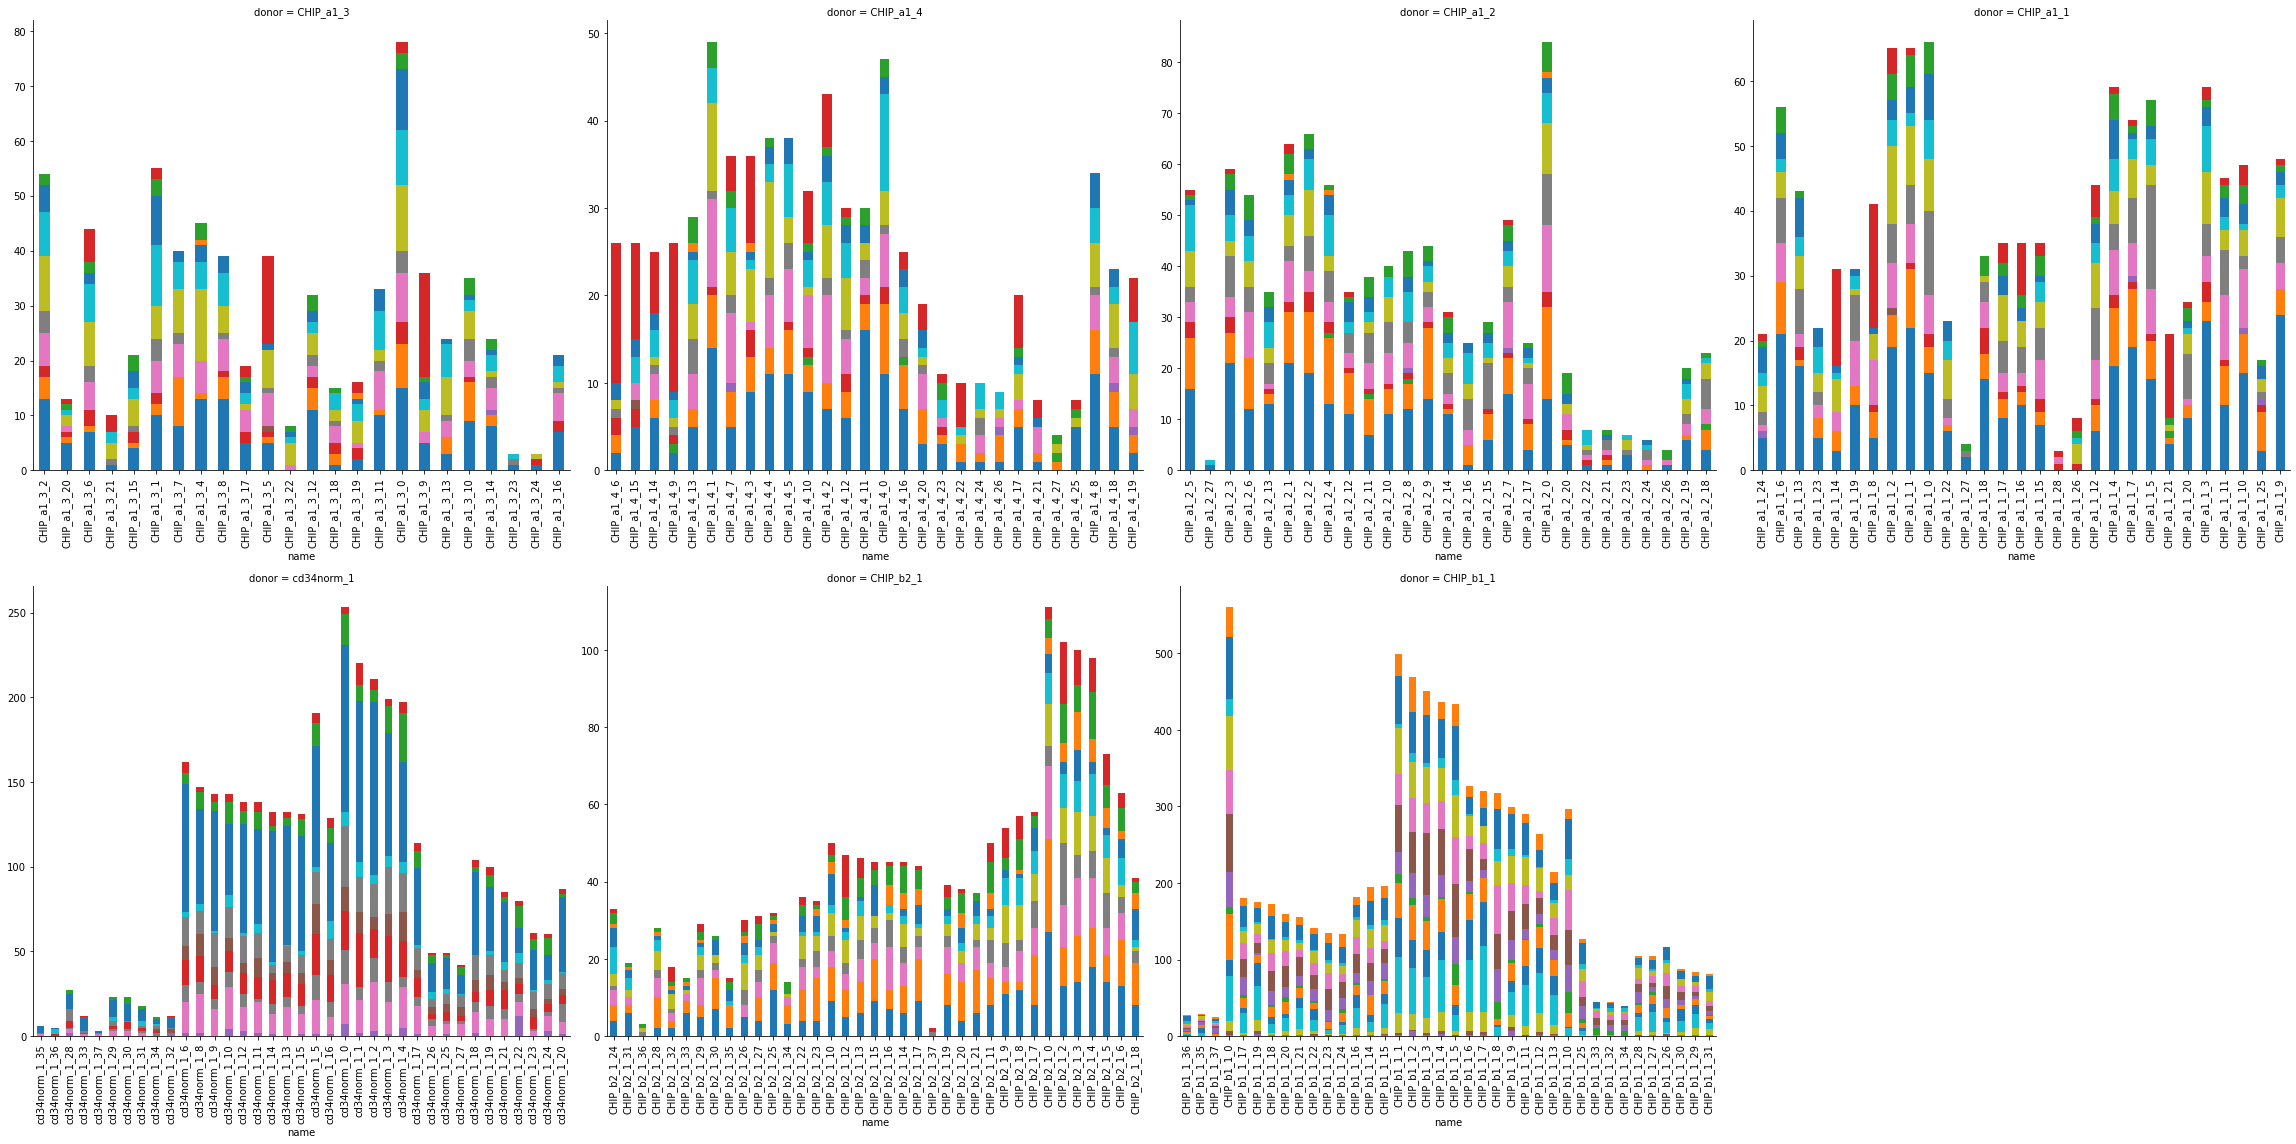

In [34]:
# donor_plots(keep_top_clones(clone_counts_filt_10_df, n_top=keep_top, min_cell=min_cell),
#       name=f"top{keep_top}_minCell{min_cell}_clone_cluster_counts")

g = sns.FacetGrid(data=top_clone_counts_df, 
                  col="donor", col_wrap=4, sharey=False, sharex=False, height=8)
g.map_dataframe(plots_donor)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)


## For norm counts

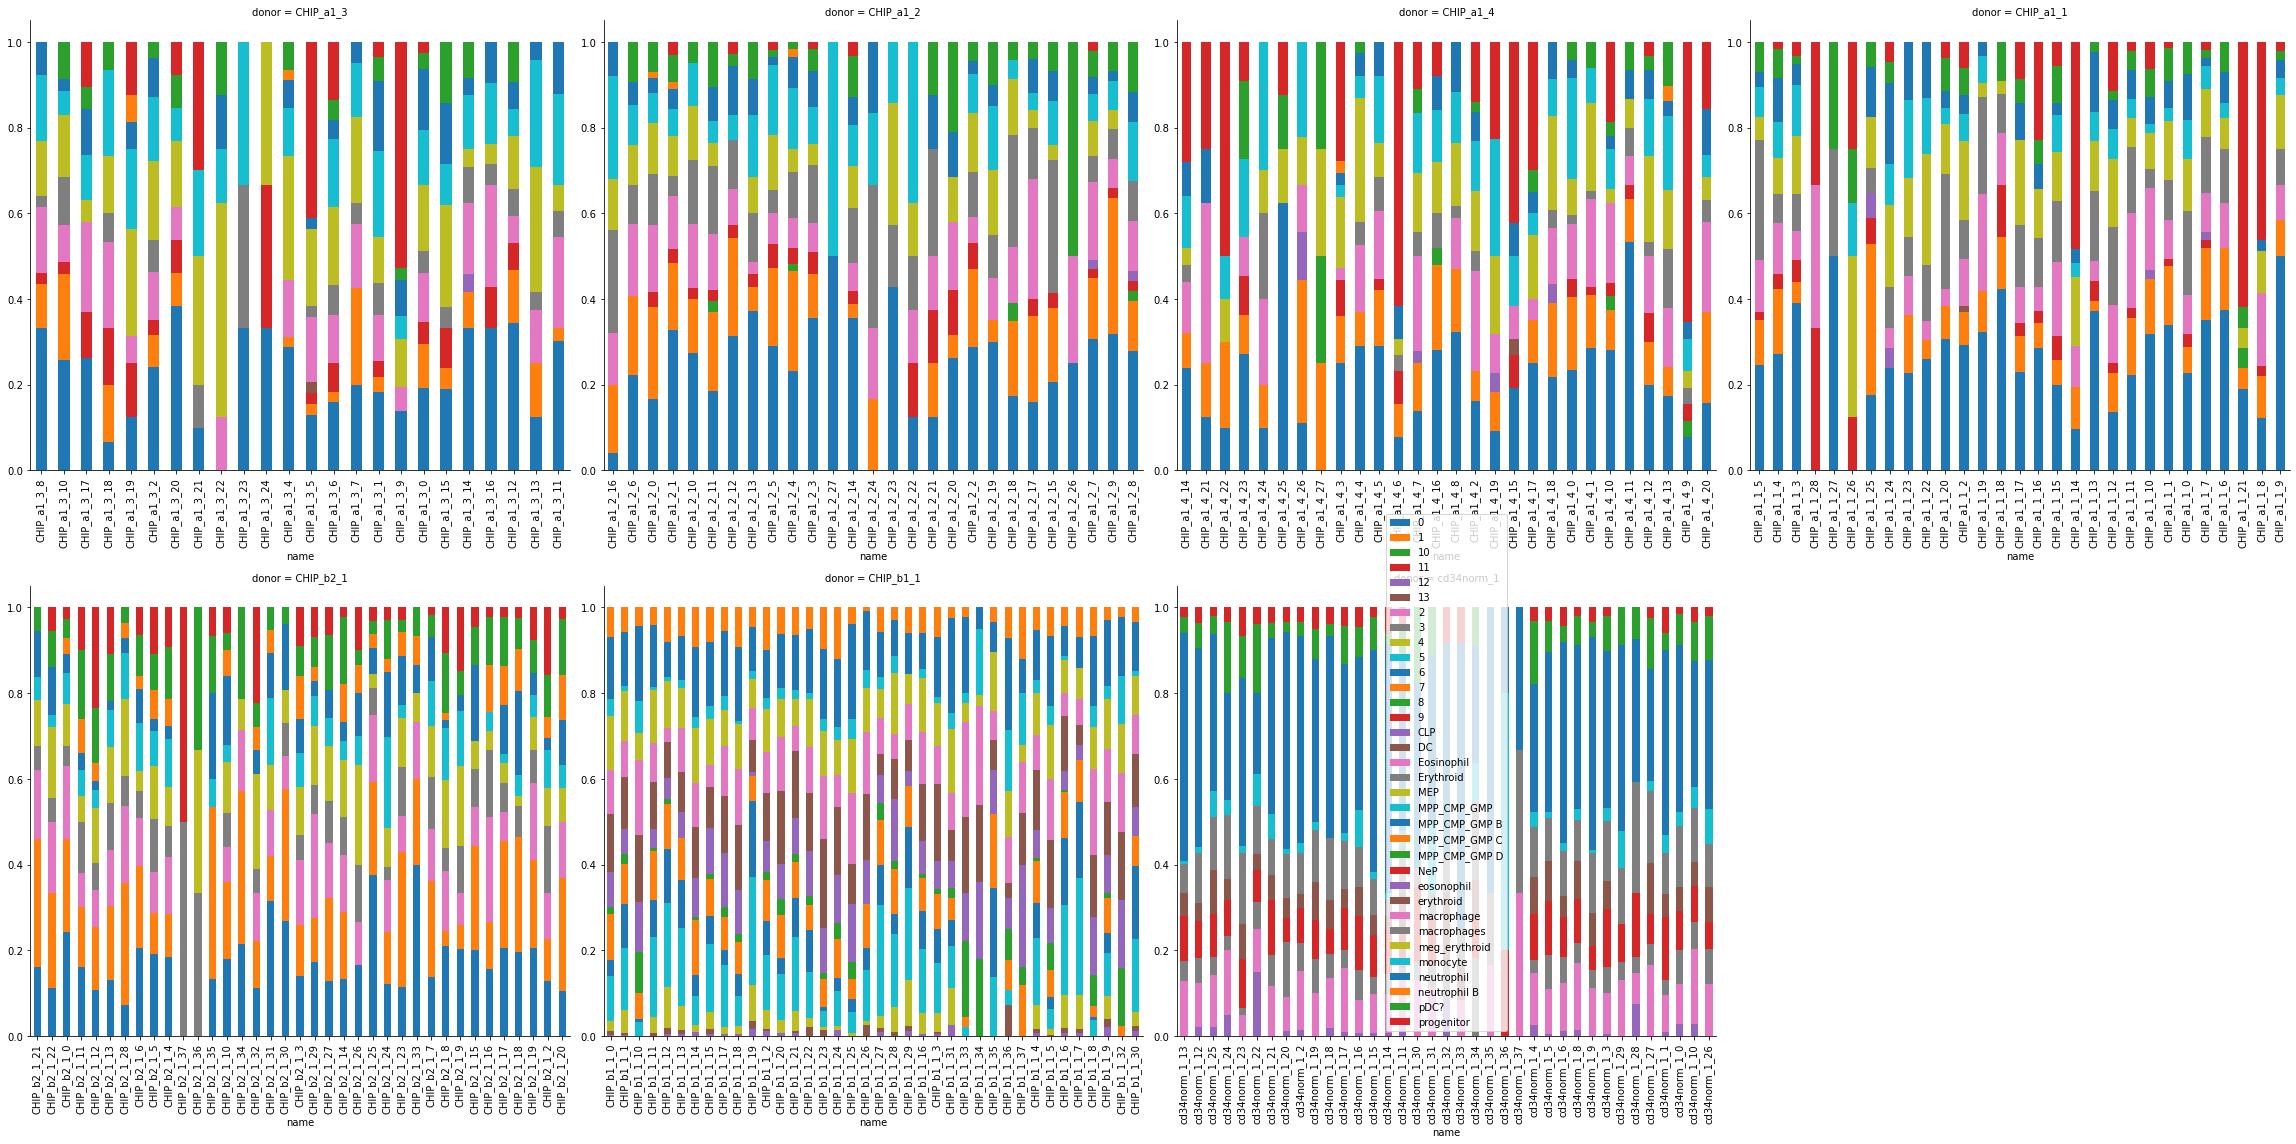

In [36]:
g = sns.FacetGrid(data=top_clone_norm_df, 
                  col="donor", col_wrap=4, sharey=False, sharex=False, height=8)
g.map_dataframe(plots_donor)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
plt.legend(loc='best')

## Plot x-axis as cluster, and hue is donor

In [43]:
wide_top_clone_counts_df = top_clone_counts_df.drop("ncells", axis=1).reset_index().melt(id_vars=["donor","name"], var_name="cluster",
                                                             value_name="ncells")
wide_top_clone_counts_df



,donor,name,cluster,ncells
0,CHIP_a1_3,CHIP_a1_3_2,0,13.0
1,CHIP_a1_3,CHIP_a1_3_20,0,5.0
2,CHIP_a1_3,CHIP_a1_3_6,0,7.0
3,CHIP_a1_3,CHIP_a1_3_21,0,1.0
4,CHIP_a1_3,CHIP_a1_3_15,0,4.0
...,...,...,...,...
7475,CHIP_b2_1,CHIP_b2_1_6,progenitor,0.0
7476,cd34norm_1,cd34norm_1_23,progenitor,4.0
7477,cd34norm_1,cd34norm_1_24,progenitor,2.0
7478,cd34norm_1,cd34norm_1_20,progenitor,3.0


<AxesSubplot:xlabel='cluster', ylabel='ncells'>

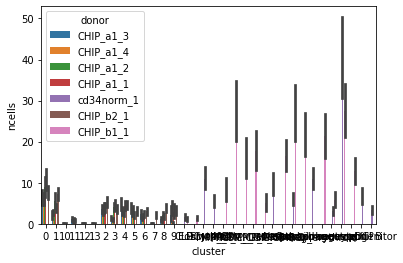

In [46]:
sns.barplot(data=wide_top_clone_counts_df, y="ncells", x="cluster", hue="donor", )

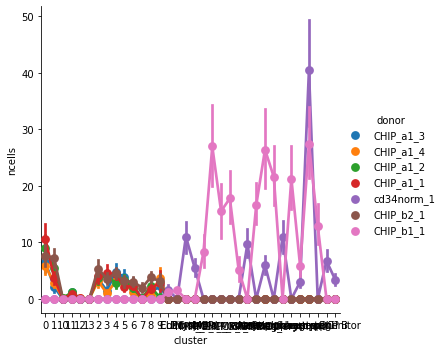

In [47]:
sns.catplot(data=wide_top_clone_counts_df, y="ncells", x="cluster", hue="donor", kind='point')

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ncells', ylabel='Density'>

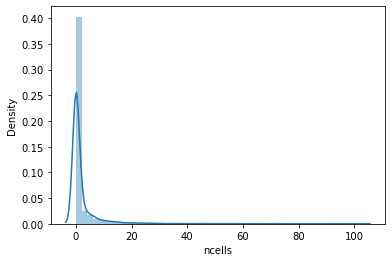

In [55]:
sns.distplot(wide_top_clone_counts_df["ncells"])

In [53]:
wide_top_clone_counts_df

,donor,name,cluster,ncells
0,CHIP_a1_3,CHIP_a1_3_2,0,13.0
1,CHIP_a1_3,CHIP_a1_3_20,0,5.0
2,CHIP_a1_3,CHIP_a1_3_6,0,7.0
3,CHIP_a1_3,CHIP_a1_3_21,0,1.0
4,CHIP_a1_3,CHIP_a1_3_15,0,4.0
...,...,...,...,...
7475,CHIP_b2_1,CHIP_b2_1_6,progenitor,0.0
7476,cd34norm_1,cd34norm_1_23,progenitor,4.0
7477,cd34norm_1,cd34norm_1_24,progenitor,2.0
7478,cd34norm_1,cd34norm_1_20,progenitor,3.0


In [49]:
wide_top_clone_counts_df["cluster"].unique()


array(['0', '1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7',
       '8', '9', 'CLP', 'DC', 'Eosinophil', 'Erythroid', 'MEP',
       'MPP_CMP_GMP', 'MPP_CMP_GMP B', 'MPP_CMP_GMP C', 'MPP_CMP_GMP D',
       'NeP', 'eosonophil', 'erythroid', 'macrophage', 'macrophages',
       'meg_erythroid', 'monocyte', 'neutrophil', 'neutrophil B', 'pDC?',
       'progenitor'], dtype=object)

---

---

---